#Theoretical Questions


###Q.1. Can we use Bagging for regression problems?

-->> Yes, bagging can be effectively used for regression problems.

###Q.2. What is the difference between multiple model training and single model training?

-->> Single model training involves training one machine learning model on a dataset, while multiple model training involves training multiple models.

###Q.3. Explain the concept of feature randomness in Random Forest?

-->> In Random Forest, feature randomness means that instead of considering all available features when splitting a node in a decision tree, each tree only considers a random subset of features.

###Q.4. What is OOB (Out-of-Bag) Score?

-->> The Out-of-Bag (OOB) score is a performance metric used in machine learning, particularly with ensemble methods like Random Forests, to estimate a model's accuracy on unseen data.

###Q.5. How can you measure the importance of features in a Random Forest model?

-->> Feature importance in Random Forest models is typically assessed by quantifying how much each feature contributes to reducing impurity (or increasing accuracy) across all trees in the forest. This is commonly achieved through Gini importance (also known as mean decrease in impurity) or permutation importance.

###Q.6. Explain the working principle of a Bagging Classifier.

-->> A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

###Q.7.  How do you evaluate a Bagging Classifier’s performance?

-->> A Bagging Classifier's performance can be evaluated using standard classification metrics like accuracy, precision, recall, and F1-score.

###Q.8. How does a Bagging Regressor work?

-->> Bagging Regressor creates an ensemble of multiple base regression models and combines their predictions to produce a final prediction. In Bagging Regressor, the base model is typically a regression algorithm, such as Decision Tree Regressor.

###Q.9.  What is the main advantage of ensemble techniques?

-->> The primary advantage of ensemble techniques is their increased accuracy and robustness compared to using a single model.

###Q.10. What is the main challenge of ensemble methods?

-->> The primary challenge of ensemble methods is managing their complexity and computational cost, especially when dealing with large datasets and complex models.

###Q.11. Explain the key idea behind ensemble techniques?

-->> The core idea behind ensemble techniques in machine learning is to combine multiple individual models (also known as base learners or weak learners) to create a more powerful and accurate predictive model.

###Q.12. What is a Random Forest Classifier?

-->> A Random Forest classifier is an ensemble learning method that combines multiple decision trees to make more accurate and robust predictions. It's particularly useful for classification tasks, where the goal is to assign data points to specific categories or classes.

###Q.13. What are the main types of ensemble techniques?

-->>  The main types of ensemble methods are bagging, boosting, and stacking.

###Q.14. What is ensemble learning in machine learning?

-->> Ensemble learning in machine learning is a technique that combines multiple individual models to create a more powerful and accurate predictive model. Instead of relying on a single model, ensemble methods leverage the collective intelligence of multiple models to overcome the limitations of individual approaches.

###Q.15. When should we avoid using ensemble methods?

-->> Ensemble methods, while powerful, aren't always the best choice. You might avoid them when computational resources are limited, when interpretability is crucial, or when data is scarce or highly correlated.

###Q.16. How does Bagging help in reducing overfitting?

-->> Bagging helps reduce overfitting by training multiple models on different subsets of the training data and then averaging their predictions.

###Q.17. Why is Random Forest better than a single Decision Tree?

-->> Random Forest is generally a better choice than a single Decision Tree because it reduces the risk of overfitting and improves generalization performance.

###Q.18. What is the role of bootstrap sampling in Bagging?

-->> In bagging (Bootstrap Aggregating), bootstrap sampling is crucial for creating diverse training datasets from the original data. It involves randomly sampling with replacement from the original dataset to generate multiple subsets.

###Q.19. What are some real-world applications of ensemble techniques?

-->> Disease prediction in healthcare, fraud detection in finance, and enhancing recommendation systems in e-commerce. They are also crucial in areas like autonomous driving, weather forecasting, and remote sensing.

###Q.20. What is the difference between Bagging and Boosting?

-->>

| Feature               | **Bagging**                                                        | **Boosting**                                       |
| --------------------- | ------------------------------------------------------------------ | -------------------------------------------------- |
| **Goal**              | Reduce variance                                                    | Reduce bias                                        |
| **Model Training**    | Models are trained **independently**                               | Models are trained **sequentially**                |
| **Data Sampling**     | Uses **bootstrap sampling** (random with replacement)              | Focuses on **harder examples** (weighted sampling) |
| **Combining Results** | **Majority voting** (classification) or **averaging** (regression) | **Weighted sum** of models' outputs                |
| **Example Algorithm** | Random Forest                                                      | AdaBoost, Gradient Boosting                        |


#Practical Questions

###Q.21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

bagging_clf = BaggingClassifier(estimator=dt, n_estimators=50, random_state=42)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.2f}")


Bagging Classifier Accuracy: 1.00


###Q.22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)

bagging_regressor = BaggingRegressor(estimator=dt_regressor, n_estimators=50, random_state=42)

bagging_regressor.fit(X_train, y_train)

y_pred = bagging_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor Mean Squared Error: {mse:.2f}")


Bagging Regressor Mean Squared Error: 2885.74


###Q.23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

importances = rf_clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
print(feature_importance_df)


Feature Importance Scores:
                    Feature  Importance
7       mean concave points    0.141934
27     worst concave points    0.127136
23               worst area    0.118217
6            mean concavity    0.080557
20             worst radius    0.077975
22          worst perimeter    0.074292
2            mean perimeter    0.060092
3                 mean area    0.053810
26          worst concavity    0.041080
0               mean radius    0.032312
13               area error    0.029538
21            worst texture    0.018786
25        worst compactness    0.017539
10             radius error    0.016435
28           worst symmetry    0.012929
12          perimeter error    0.011770
24         worst smoothness    0.011769
1              mean texture    0.011064
5          mean compactness    0.009216
19  fractal dimension error    0.007135
29  worst fractal dimension    0.006924
4           mean smoothness    0.006223
14         smoothness error    0.005881
16          c

###Q.24. Train a Random Forest Regressor and compare its performance with a single Decision Tree?


In [4]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Decision Tree Regressor MSE: {mse_dt:.2f}")
print(f"Random Forest Regressor MSE: {mse_rf:.2f}")


Decision Tree Regressor MSE: 6582.72
Random Forest Regressor MSE: 2851.26


###Q.25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, bootstrap=True, random_state=42)
rf_clf.fit(X_train, y_train)

print(f"Out-of-Bag (OOB) Score: {rf_clf.oob_score_:.4f}")


Out-of-Bag (OOB) Score: 0.9548


###Q.25. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(probability=True, kernel='rbf', random_state=42)

bagging_svm = BaggingClassifier(estimator=svm, n_estimators=10, random_state=42)

bagging_svm.fit(X_train, y_train)

y_pred = bagging_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Bagging Classifier with SVM Accuracy: {accuracy:.2f}")


Bagging Classifier with SVM Accuracy: 1.00


###Q.27.  Train a Random Forest Classifier with different numbers of trees and compare accuracy?


n_estimators = 1: Accuracy = 0.9474
n_estimators = 5: Accuracy = 0.9649
n_estimators = 10: Accuracy = 0.9649
n_estimators = 50: Accuracy = 0.9708
n_estimators = 100: Accuracy = 0.9708
n_estimators = 200: Accuracy = 0.9708


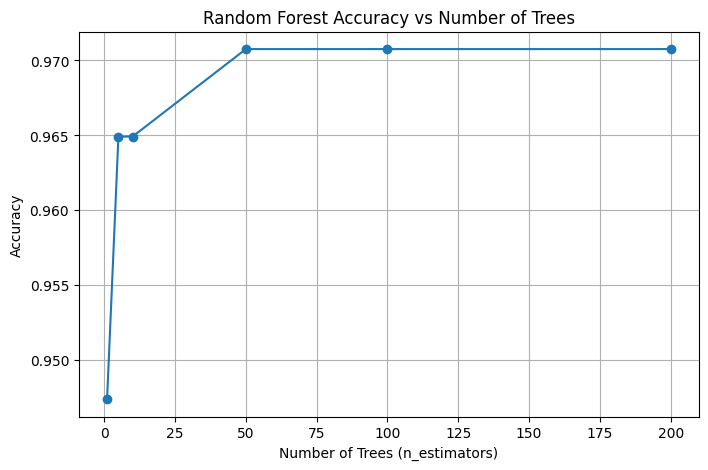

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators_list = [1, 5, 10, 50, 100, 200]
accuracies = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators = {n}: Accuracy = {acc:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, accuracies, marker='o')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


###Q.28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

bagging_clf = BaggingClassifier(estimator=log_reg, n_estimators=10, random_state=42)

bagging_clf.fit(X_train, y_train)

y_proba = bagging_clf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print(f"Bagging Classifier with Logistic Regression - AUC Score: {auc:.4f}")


Bagging Classifier with Logistic Regression - AUC Score: 0.9978


###Q.29.  Train a Random Forest Regressor and analyze feature importance scores.

Random Forest Regressor MSE: 0.2565

Feature Importances:
      Feature  Importance
0      MedInc    0.526011
5    AveOccup    0.138220
7   Longitude    0.086124
6    Latitude    0.086086
1    HouseAge    0.054654
2    AveRooms    0.047188
4  Population    0.031722
3   AveBedrms    0.029995


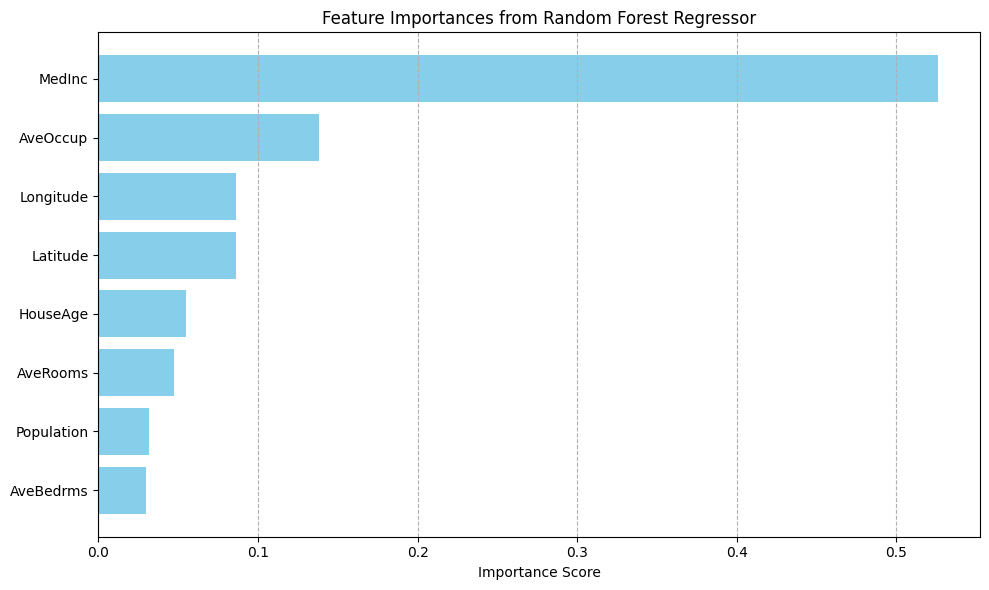

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Regressor MSE: {mse:.4f}")

importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importances from Random Forest Regressor")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--')
plt.tight_layout()
plt.show()


###Q.30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
acc_bagging = accuracy_score(y_test, y_pred_bagging)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Bagging Classifier Accuracy      : {acc_bagging:.4f}")
print(f"Random Forest Classifier Accuracy: {acc_rf:.4f}")


Bagging Classifier Accuracy      : 0.9591
Random Forest Classifier Accuracy: 0.9708


###Q.31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nBest Hyperparameters:")
print(grid_search.best_params_)
print(f"Test Accuracy with Best Model: {accuracy:.4f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Hyperparameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy with Best Model: 0.9708


###Q.32. Train a Bagging Regressor with different numbers of base estimators and compare performance.


n_estimators = 1: MSE = 7592.56
n_estimators = 5: MSE = 3813.33
n_estimators = 10: MSE = 3370.71
n_estimators = 50: MSE = 2885.74
n_estimators = 100: MSE = 2865.73
n_estimators = 200: MSE = 2831.92


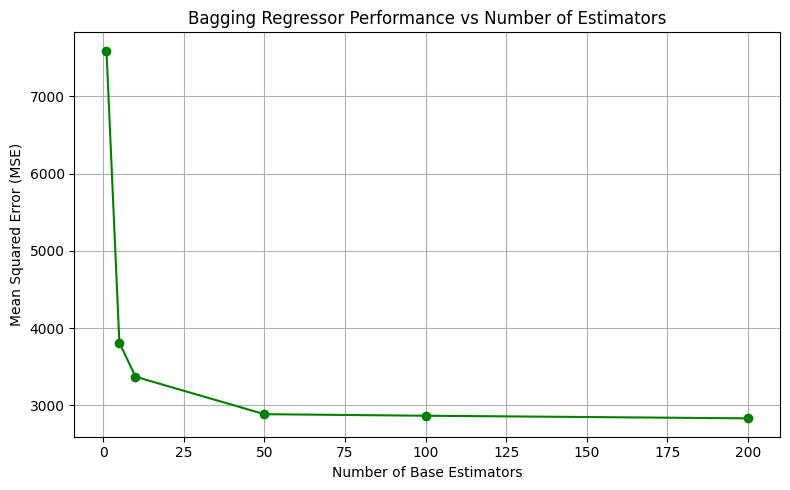

In [12]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators_list = [1, 5, 10, 50, 100, 200]
mse_scores = []

for n in n_estimators_list:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"n_estimators = {n}: MSE = {mse:.2f}")


plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, mse_scores, marker='o', color='green')
plt.title("Bagging Regressor Performance vs Number of Estimators")
plt.xlabel("Number of Base Estimators")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()


###Q.33.  Train a Random Forest Classifier and analyze misclassified samples.

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

misclassified_indices = (y_test != y_pred)
X_misclassified = X_test[misclassified_indices]
y_true_misclassified = y_test[misclassified_indices]
y_pred_misclassified = y_pred[misclassified_indices]

misclassified_df = pd.DataFrame(X_misclassified, columns=feature_names)
misclassified_df['True Label'] = y_true_misclassified
misclassified_df['Predicted Label'] = y_pred_misclassified

print("\nMisclassified Samples:")
print(misclassified_df)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


###Q.34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
accuracy_bag = accuracy_score(y_test, y_pred_bag)

print(f"Decision Tree Accuracy      : {accuracy_dt:.4f}")
print(f"Bagging Classifier Accuracy : {accuracy_bag:.4f}")


Decision Tree Accuracy      : 0.9415
Bagging Classifier Accuracy : 0.9591


###Q.35. Train a Random Forest Classifier and visualize the confusion matrix.

Test Accuracy: 0.9708


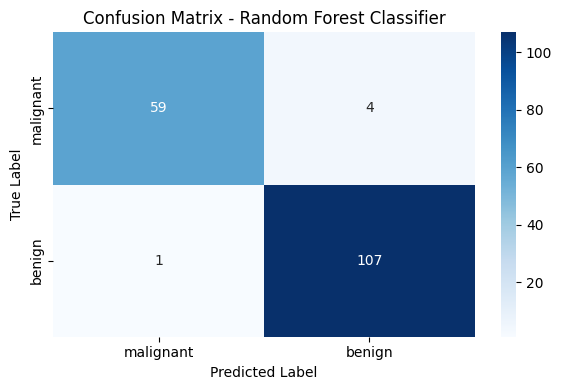

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


###Q.36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, kernel='rbf', random_state=42)

lr = LogisticRegression(solver='liblinear', random_state=42)

stack_model = StackingClassifier(
    estimators=[('dt', dt), ('svm', svm)],
    final_estimator=lr,
    passthrough=False,
    cv=5
)

dt.fit(X_train, y_train)
svm.fit(X_train, y_train)

stack_model.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_stack = stack_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_stack = accuracy_score(y_test, y_pred_stack)

print(f"Decision Tree Accuracy      : {acc_dt:.4f}")
print(f"SVM Accuracy                : {acc_svm:.4f}")
print(f"Stacking Classifier Accuracy: {acc_stack:.4f}")


Decision Tree Accuracy      : 0.9415
SVM Accuracy                : 0.9357
Stacking Classifier Accuracy: 0.9708


###Q.37. Train a Random Forest Classifier and print the top 5 most important features.

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 5 Most Important Features:")
print(importance_df.head(5))


Top 5 Most Important Features:
                 Feature  Importance
7    mean concave points    0.141934
27  worst concave points    0.127136
23            worst area    0.118217
6         mean concavity    0.080557
20          worst radius    0.077975


###Q.38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Precision: 0.9633
Recall   : 0.9722
F1-Score : 0.9677

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



###Q.39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

max_depth = 1: Accuracy = 0.9591
max_depth = 3: Accuracy = 0.9708
max_depth = 5: Accuracy = 0.9649
max_depth = 7: Accuracy = 0.9649
max_depth = 10: Accuracy = 0.9708
max_depth = 15: Accuracy = 0.9708
max_depth = 20: Accuracy = 0.9708
max_depth = None: Accuracy = 0.9708


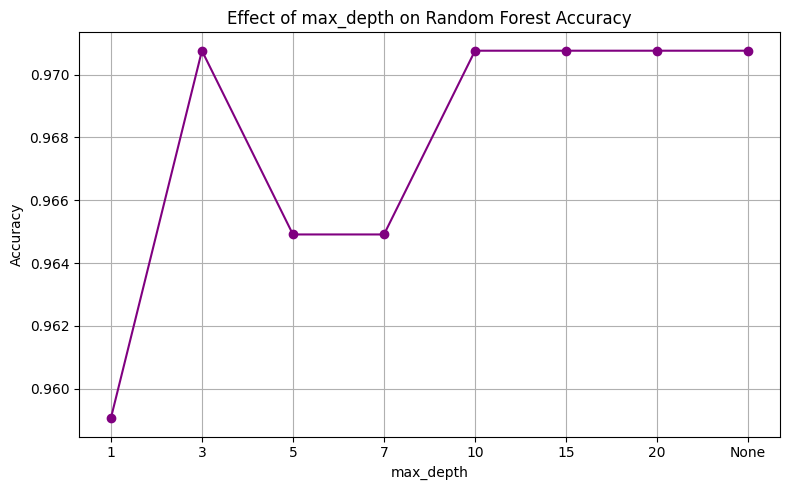

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

max_depth_values = [1, 3, 5, 7, 10, 15, 20, None]
accuracies = []

for depth in max_depth_values:
    model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"max_depth = {depth}: Accuracy = {acc:.4f}")

plt.figure(figsize=(8, 5))
depth_labels = [str(d) if d is not None else 'None' for d in max_depth_values]
plt.plot(depth_labels, accuracies, marker='o', color='purple')
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


###Q.40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

In [19]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=50,
    random_state=42
)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

bagging_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(),
    n_estimators=50,
    random_state=42
)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"Bagging Regressor (Decision Tree)  - MSE: {mse_dt:.2f}")
print(f"Bagging Regressor (K-Neighbors)    - MSE: {mse_knn:.2f}")


Bagging Regressor (Decision Tree)  - MSE: 2885.74
Bagging Regressor (K-Neighbors)    - MSE: 4147.99


###Q.41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_proba = rf.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print(f"Random Forest Classifier ROC-AUC Score: {roc_auc:.4f}")


Random Forest Classifier ROC-AUC Score: 0.9968


###Q.42. Train a Bagging Classifier and evaluate its performance using cross-validation.

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

data = load_breast_cancer()
X, y = data.data, data.target

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)

cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-Validation Accuracy Scores: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean Accuracy: 0.9544
Standard Deviation: 0.0339


###Q.43. Train a Random Forest Classifier and plot the Precision-Recall curve.

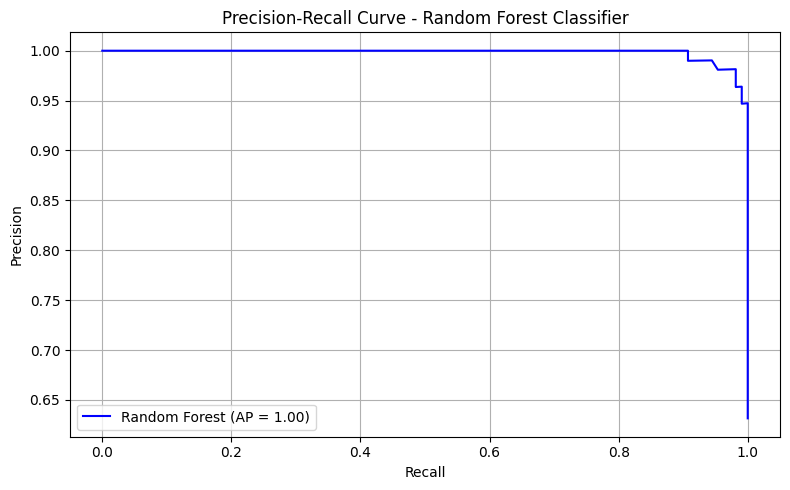

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_scores = rf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Random Forest (AP = {avg_precision:.2f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest Classifier")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###Q.44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(solver='liblinear', random_state=42)

stack_model = StackingClassifier(
    estimators=[('rf', rf), ('lr', lr)],
    final_estimator=LogisticRegression(solver='liblinear'),
    cv=5
)

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
stack_model.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_stack = stack_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_stack = accuracy_score(y_test, y_pred_stack)

print(f"Random Forest Accuracy       : {acc_rf:.4f}")
print(f"Logistic Regression Accuracy : {acc_lr:.4f}")
print(f"Stacking Classifier Accuracy : {acc_stack:.4f}")


Random Forest Accuracy       : 0.9708
Logistic Regression Accuracy : 0.9649
Stacking Classifier Accuracy : 0.9766


###Q.45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

max_samples = 0.3: MSE = 3403.47
max_samples = 0.5: MSE = 3203.45
max_samples = 0.7: MSE = 3163.66
max_samples = 1.0: MSE = 2885.74


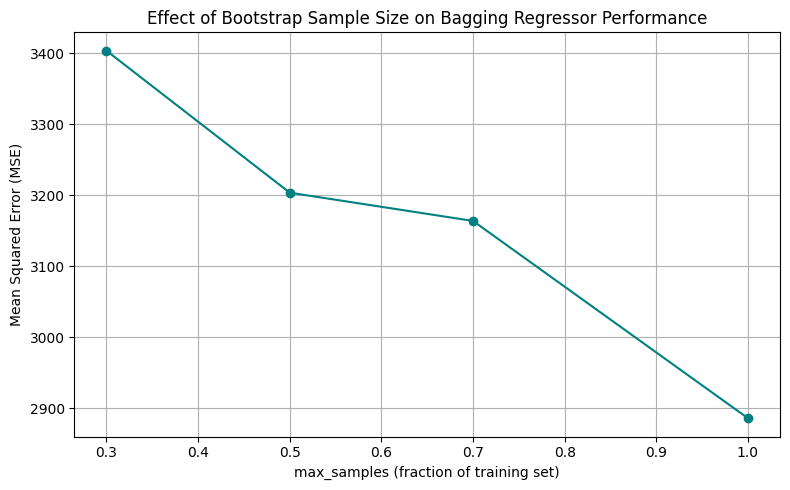

In [24]:
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=1000, n_features=10, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sample_sizes = [0.3, 0.5, 0.7, 1.0]
mse_scores = []

for sample in sample_sizes:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=50,
        max_samples=sample,
        bootstrap=True,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"max_samples = {sample}: MSE = {mse:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, mse_scores, marker='o', color='teal')
plt.title("Effect of Bootstrap Sample Size on Bagging Regressor Performance")
plt.xlabel("max_samples (fraction of training set)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()
